In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Movies dataset file
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
#Reading the Credits dataset File
movies_credits = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
#Checking the dataset
movies['original_title'] = movies['original_title'].apply(lambda x:x.lower())

In [5]:
movies['original_title']

0                                         avatar
1       pirates of the caribbean: at world's end
2                                        spectre
3                          the dark knight rises
4                                    john carter
                          ...                   
4798                                 el mariachi
4799                                   newlyweds
4800                   signed, sealed, delivered
4801                            shanghai calling
4802                           my date with drew
Name: original_title, Length: 4803, dtype: object

In [6]:
#Checking for any nulls in the dataset
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

In [7]:
#checking how many null values each column contain
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
movies[movies['tagline'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,superman returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,star trek beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://disney.go.com/disneypictures/up/,14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Up,7.7,6870
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",http://movies.disney.com/the-jungle-book-2016,278927,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,the jungle book,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Jungle Book,6.7,2892
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",http://www.angelsanddemons.com/,13448,"[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,angels & demons,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Angels & Demons,6.5,2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,[],en,sanctuary: quite a conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"signed, sealed, delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,

As homepage and Tagline columns are not required for making recommendations so We can drop these columns.

In [9]:
#Dropping homepage and Tagline columns
movies = movies.drop(['homepage','tagline'],axis=1)

#### We will be making recommendations based on plot summary of the given Movie so Important columns here are title of the movies and overview/plot of the Movies 

In [10]:
#checking if overview contain any null values
movies.isnull().any()

budget                  False
genres                  False
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
title                   False
vote_average            False
vote_count              False
dtype: bool

In [11]:
#dropping rows that contain null values because only 3 movies have null overviews.
movies = movies[movies['overview'].notna()]

In [12]:
movies

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,pirates of the caribbean: at world's end,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,the dark knight rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,john carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,el mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"signed, sealed, delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,[],en,shanghai calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,5.7,7


### Exploratory Data Analysis 

In [13]:
top_20_popular = movies.sort_values('popularity',ascending=False)

In [14]:
top_20_popular = top_20_popular.iloc[:20,:]

In [15]:
top_20_popular

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Minions,6.4,4571
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Interstellar,8.1,10867
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Deadpool,7.4,10995
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,guardians of the galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Guardians of the Galaxy,7.9,9742
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,mad max: fury road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mad Max: Fury Road,7.2,9427
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,jurassic world,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Jurassic World,6.5,8662
199,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,pirates of the caribbean: the curse of the bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-07-09,655011224,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985
82,170000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",119450,"[{""id"": 3077, ""name"": ""leader""}, {""id"": 4090, ...",en,dawn of the planet of the apes,A group of scientists in San Francisco struggl...,243.791743,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06-26,710644566,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dawn of the Planet of the Apes,7.3,4410
200,125000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",131631,"[{""id"": 836, ""n

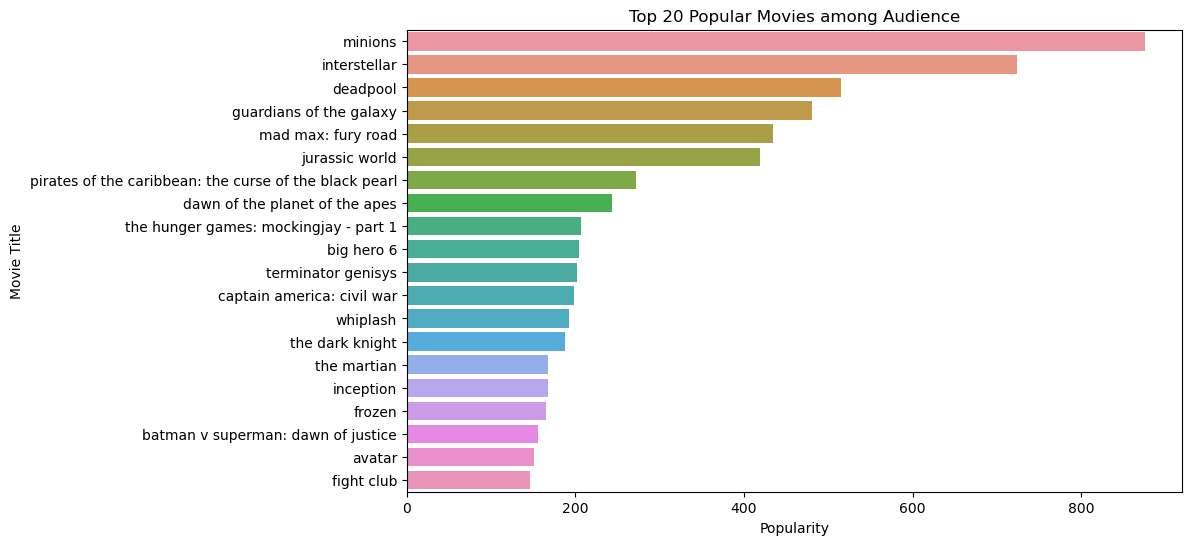

In [16]:
#top 20 Popular movies among People
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_popular['popularity'],y=top_20_popular['original_title'])
plt.title('Top 20 Popular Movies among Audience')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

Interstellar and Minions are the most popular movies as compared to other Movies.

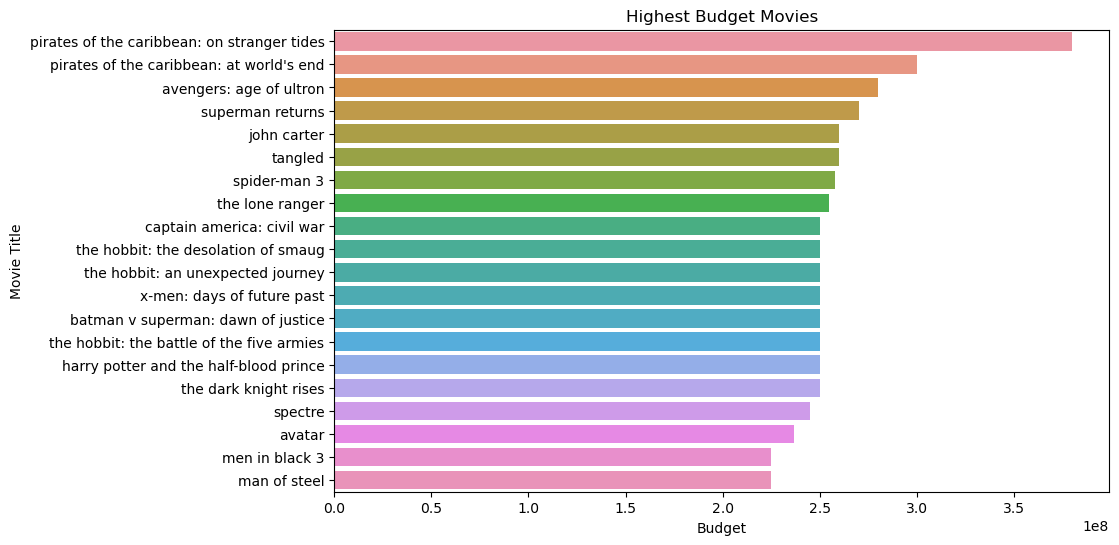

In [17]:
#top 20 Budget Movies
top_20_budget = movies.sort_values('budget',ascending=False)
top_20_budget = top_20_budget.iloc[:20,:]
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_budget['budget'],y=top_20_budget['original_title'])
plt.title('Highest Budget Movies')
plt.xlabel('Budget')
plt.ylabel('Movie Title')
plt.show()

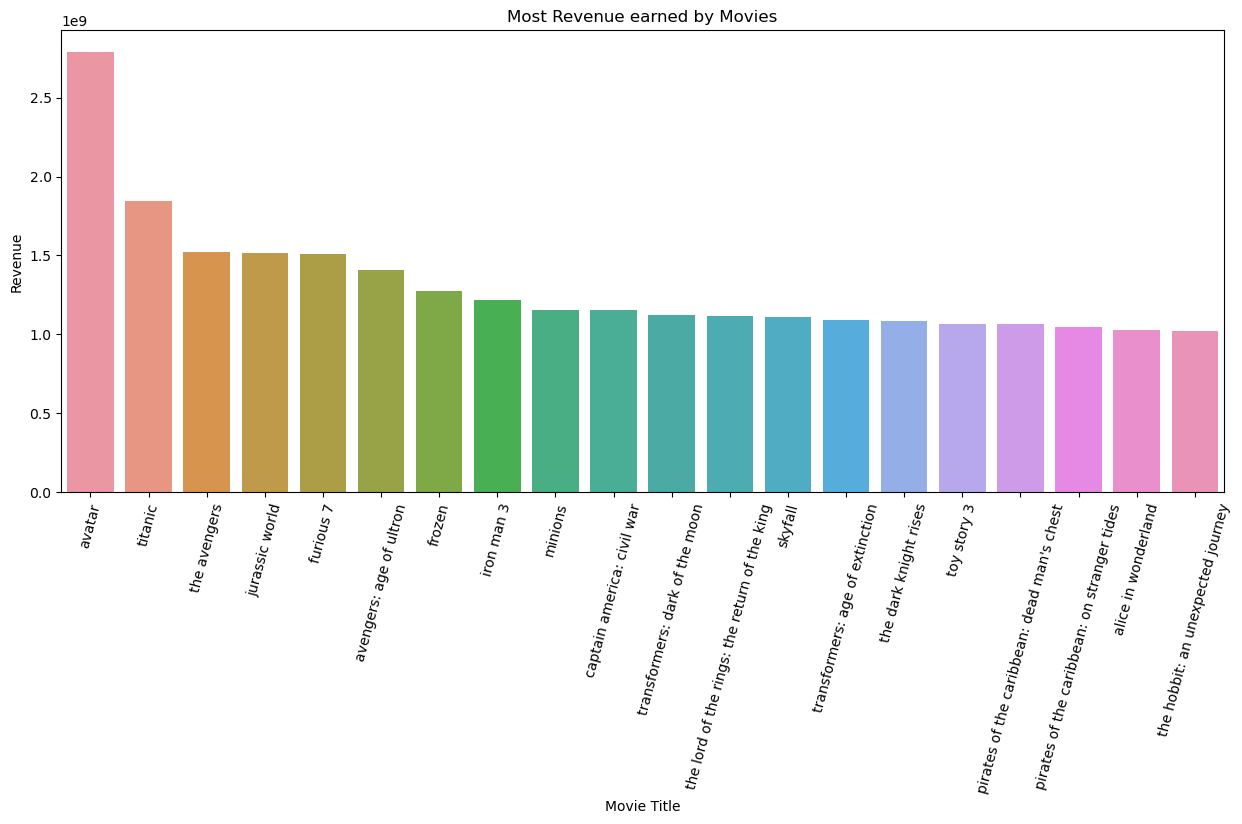

In [18]:
#Top 20 highest earned revenue movies
top_20_revenue = movies.sort_values('revenue',ascending=False)
top_20_revenue = top_20_revenue.iloc[:20,:]
plt.figure(figsize=(15,6))
sns.barplot(x=top_20_revenue['original_title'],y=top_20_revenue['revenue'])
plt.xticks(rotation=75)
plt.title('Most Revenue earned by Movies')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.show()

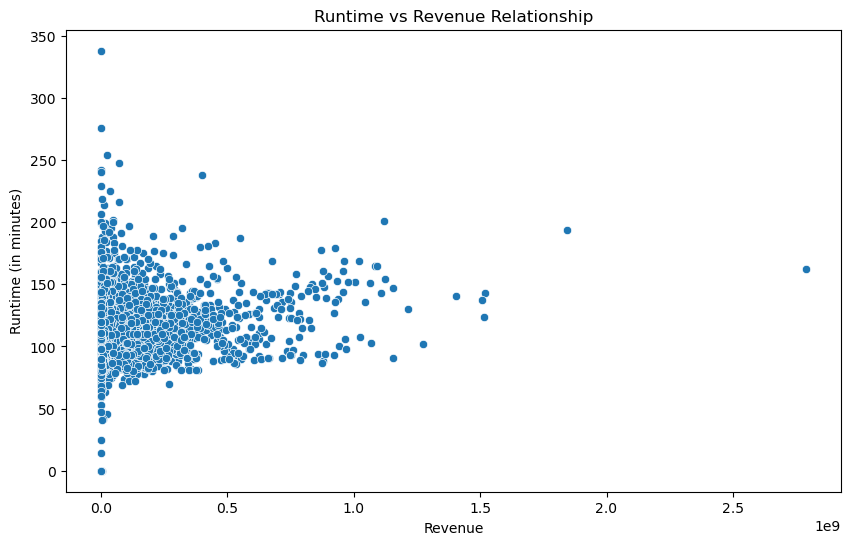

In [19]:
#Relationship between revenue and runtime
plt.figure(figsize=(10,6))
sns.scatterplot(x=movies['revenue'],y=movies['runtime'])
plt.title('Runtime vs Revenue Relationship')
plt.xlabel('Revenue')
plt.ylabel('Runtime (in minutes)')
plt.show()

### Building a Recommendation System

In [20]:
#Dropping columns that are not required
movies = movies.drop(['production_companies','production_countries','release_date','spoken_languages','status','genres','id','budget'],axis=1)

In [21]:
movies = movies.drop(['keywords','original_language','title'],axis=1)

In [22]:
movies

,original_title,overview,popularity,revenue,runtime,vote_average,vote_count
0,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800
1,pirates of the caribbean: at world's end,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500
2,spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466
3,the dark knight rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106
4,john carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,el mariachi,El Mariachi just wants to play his guitar and ...,14.269792,2040920,81.0,6.6,238
4799,newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,0,85.0,5.9,5
4800,"signed, sealed, delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,0,120.0,7.0,6
4801,shanghai calling,When ambitious New York attorney Sam is sent t...,0.857008,0,98.0,5.7,7


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=3,ngram_range=(1,3),analyzer='word',stop_words='english')
tf_matrix = tfidf.fit_transform(movies['overview'])
print(tf_matrix.shape)

(4800, 9919)


In [24]:
from sklearn.metrics.pairwise import sigmoid_kernel

sgm = sigmoid_kernel(tf_matrix,tf_matrix)


In [25]:
sgm

array([[0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163649, 0.76159416, ..., 0.76159519, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76163649, ..., 0.76159484, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159519, 0.76159484, ..., 0.76163649, 0.76159488,
        0.76159447],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159488, 0.76163649,
        0.76159467],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159447, 0.76159467,
        0.76163649]])

In [26]:
indices = pd.Series(movies.index,index=movies['original_title']).drop_duplicates()

In [27]:
indices

original_title
avatar                                         0
pirates of the caribbean: at world's end       1
spectre                                        2
the dark knight rises                          3
john carter                                    4
                                            ... 
el mariachi                                 4798
newlyweds                                   4799
signed, sealed, delivered                   4800
shanghai calling                            4801
my date with drew                           4802
Length: 4800, dtype: int64

In [28]:
indices['newlyweds']

4799

In [29]:
sgm[4799]

array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159447, 0.76159467,
       0.76163649])

In [30]:
sig_scores = list(enumerate(sgm[4799]))

In [31]:
sig_scores = sorted(sig_scores,key=lambda x:x[1],reverse=True)
movie_scores = sig_scores[1:11]

In [32]:
ind = [i[0] for i in movie_scores]

In [33]:
movies['original_title'].iloc[ind]

4532                     lonesome jim
2586                      firestarter
3245                            50/50
4100                          captive
868                     elizabethtown
4403                   the jimmy show
204                         fast five
1171               dumb and dumber to
1685                keeping the faith
2528    jackass presents: bad grandpa
Name: original_title, dtype: object

In [40]:
def recommend(name,sig=sgm):
    idx = indices[name]
    movie_scores = list(enumerate(sig[idx]))
    movie_scores = sorted(movie_scores,key = lambda x:x[1],reverse=True)
    top_10_similar_movies_indices = movie_scores[1:11]
    movies_indices = [i[0] for i in top_10_similar_movies_indices]
    return movies['original_title'].iloc[movies_indices]

In [46]:
n=input("Enter movie name")#input movie name
recommendations = recommend(n) 
list(recommendations.values)

Enter movie name avatar


['obitaemyy ostrov',
 'the matrix',
 'apollo 18',
 'the american',
 'supernova',
 'tears of the sun',
 'beowulf',
 'the adventures of pluto nash',
 'semi-pro',
 'ransom']